In [1]:
import numpy
from numpy import arange
from matplotlib import pyplot as plt

import pandas
#from pandas.tools.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error

In [2]:
#%% Load dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data"
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
dataset = pandas.read_csv(url, delim_whitespace=True, names=names)

In [3]:
filename = ("housing.csv")
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', \
         'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
dataset = pandas.read_csv(filename, delim_whitespace=True, names=names)

In [4]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [17]:
#%% Summarize Data

# Descriptive statistics
# shape
dataset.shape

(506, 14)

In [18]:
# types
dataset.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [19]:
# head
dataset.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,6.32e-03,18.0,2.31,0,0.54,6.58,65.2,4.09,1,296.0,15.3,396.90,4.98,24.0
1,2.73e-02,0.0,7.07,0,0.47,6.42,78.9,4.97,2,242.0,17.8,396.90,9.14,21.6
2,2.73e-02,0.0,7.07,0,0.47,7.18,61.1,4.97,2,242.0,17.8,392.83,4.03,34.7
3,3.24e-02,0.0,2.18,0,0.46,7.00,45.8,6.06,3,222.0,18.7,394.63,2.94,33.4
4,6.91e-02,0.0,2.18,0,0.46,7.15,54.2,6.06,3,222.0,18.7,396.90,5.33,36.2
5,2.99e-02,0.0,2.18,0,0.46,6.43,58.7,6.06,3,222.0,18.7,394.12,5.21,28.7
6,8.83e-02,12.5,7.87,0,0.52,6.01,66.6,5.56,5,311.0,15.2,395.60,12.43,22.9
7,1.45e-01,12.5,7.87,0,0.52,6.17,96.1,5.95,5,311.0,15.2,396.90,19.15,27.1
8,2.11e-01,12.5,7.87,0,0.52,5.63,100.0,6.08,5,311.0,15.2,386.63,29.93,16.5
9,1.70e-01,12.5,7.87,0,0.52,6.00,85.9,6.59,5,311.0,15.2,386.71,17.10,18.9


In [20]:
# descriptions, change precision to 2 places
pandas.set_option('precision', 2)
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.61,8.60,6.32e-03,0.08,0.26,3.68,88.98
ZN,506.0,11.36,23.32,0.00e+00,0.00,0.00,12.50,100.00
INDUS,506.0,11.14,6.86,4.60e-01,5.19,9.69,18.10,27.74
CHAS,506.0,0.07,0.25,0.00e+00,0.00,0.00,0.00,1.00
NOX,506.0,0.55,0.12,3.85e-01,0.45,0.54,0.62,0.87
RM,506.0,6.28,0.70,3.56e+00,5.89,6.21,6.62,8.78
AGE,506.0,68.57,28.15,2.90e+00,45.02,77.50,94.07,100.00
DIS,506.0,3.80,2.11,1.13e+00,2.10,3.21,5.19,12.13
RAD,506.0,9.55,8.71,1.00e+00,4.00,5.00,24.00,24.00
TAX,506.0,408.24,168.54,1.87e+02,279.00,330.00,666.00,711.00


In [23]:
# correlation
#set_option('precision', 2)
dataset.corr(method='pearson')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.00,-0.20,0.41,-5.59e-02,0.42,-0.22,0.35,-0.38,6.26e-01,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.20,1.00,-0.53,-4.27e-02,-0.52,0.31,-0.57,0.66,-3.12e-01,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1.00,6.29e-02,0.76,-0.39,0.64,-0.71,5.95e-01,0.72,0.38,-0.36,0.60,-0.48
CHAS,-0.06,-0.04,0.06,1.00e+00,0.09,0.09,0.09,-0.10,-7.37e-03,-0.04,-0.12,0.05,-0.05,0.18
NOX,0.42,-0.52,0.76,9.12e-02,1.00,-0.30,0.73,-0.77,6.11e-01,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,9.13e-02,-0.30,1.00,-0.24,0.21,-2.10e-01,-0.29,-0.36,0.13,-0.61,0.70
AGE,0.35,-0.57,0.64,8.65e-02,0.73,-0.24,1.00,-0.75,4.56e-01,0.51,0.26,-0.27,0.60,-0.38
DIS,-0.38,0.66,-0.71,-9.92e-02,-0.77,0.21,-0.75,1.00,-4.95e-01,-0.53,-0.23,0.29,-0.50,0.25
RAD,0.63,-0.31,0.60,-7.37e-03,0.61,-0.21,0.46,-0.49,1.00e+00,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-3.56e-02,0.67,-0.29,0.51,-0.53,9.10e-01,1.00,0.46,-0.44,0.54,-0.47


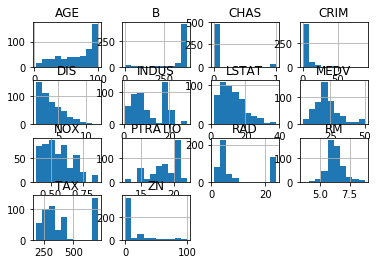

In [24]:
#%% Data visualizations

# histograms
dataset.hist()
plt.show()

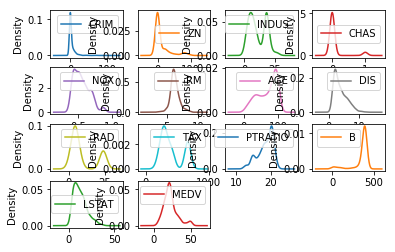

In [25]:
# density
dataset.plot(kind='density', subplots=True, \
             layout=(4,4), sharex=False)
plt.show()

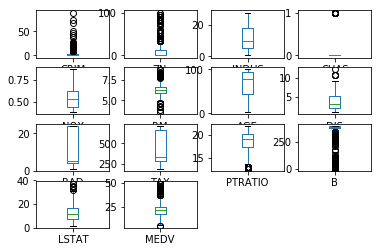

In [26]:
# box and whisker plots
dataset.plot(kind='box', subplots=True, \
             layout=(4,4), sharex=False, sharey=False)
plt.show()

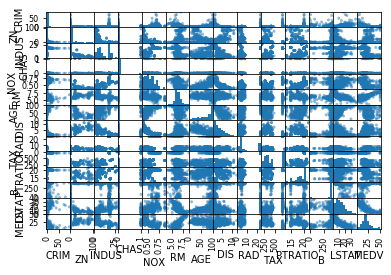

In [27]:
# scatter plot matrix
pandas.plotting.scatter_matrix(dataset)
plt.show()

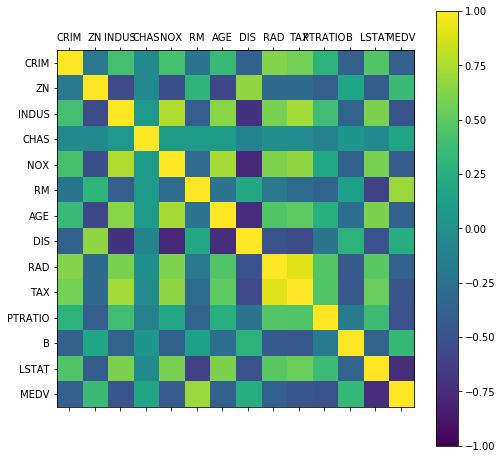

In [28]:
# correlation matrix
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
cax = ax.matshow(dataset.corr(), vmin=-1, \
                 vmax=1, interpolation='none')
fig.colorbar(cax)
ticks = numpy.arange(0,14,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

In [29]:
#%% Prepare Data
from sklearn.model_selection import train_test_split

# Split-out validation dataset
array = dataset.values
X = array[:,:-1]
Y = array[:,-1]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, \
                                                    random_state=5)


In [30]:
print(X.shape)
print(Y.shape)

(506, 13)
(506,)


In [31]:
#%% Spot Check Algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))

In [32]:
scoring = 'neg_mean_squared_error'  # or 'r2'
#scoring = 'r2'

In [33]:
#%% evaluate each model in turn
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=5, shuffle=True, random_state=5)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, \
                                 scoring=scoring) 
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
#     print(sorted(cv_results, reverse=True))

LR: -24.124902 (7.719704)
LASSO: -29.358936 (9.353462)
EN: -28.303126 (9.082332)
KNN: -42.385205 (11.993433)
CART: -35.582832 (16.619261)
SVR: -85.231792 (16.377336)


D:\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 

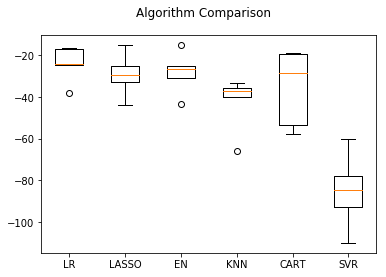

In [34]:
#%% Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [35]:
scaler = StandardScaler()
rescaled_X = scaler.fit_transform(X_train)

In [36]:
#%% Standardize the dataset
# pipelines = []
# pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LinearRegression())])))
# pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO', Lasso())])))
# pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN', ElasticNet())])))
# pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())])))
# pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeRegressor())])))
# pipelines.append(('ScaledSVR', Pipeline([('Scaler', StandardScaler()),('SVR', SVR())])))
results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=5, shuffle=True, random_state=5)
    cv_results = cross_val_score(model, rescaled_X, Y_train, cv=kfold, scoring = scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: -24.124902 (7.719704)
LASSO: -29.447205 (9.219824)
EN: -31.333037 (11.309673)
KNN: -27.604541 (10.022348)
CART: -34.746141 (13.815850)
SVR: -32.002965 (13.545118)


D:\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 

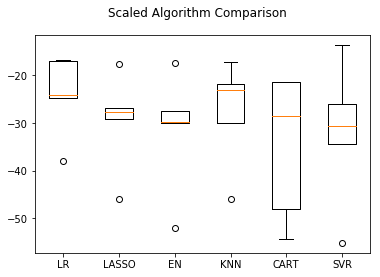

In [37]:
#%% Compare Algorithms
fig = plt.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [38]:
#%% KNN Algorithm tuning
# scaler = StandardScaler().fit(X_train)
# rescaledX = scaler.transform(X_train)
k_values = numpy.array([1,3,5,7,9,11,13,15,16,17,18,19,21])
param_grid = dict(n_neighbors=k_values)

model = KNeighborsRegressor()
kfold = KFold(n_splits=5, shuffle=True, random_state=5)

grid = GridSearchCV(estimator=model, param_grid=param_grid, \
                    scoring=scoring, cv=kfold)  
grid_result = grid.fit(rescaled_X, Y_train)

print("Best: %f using %s" % (grid_result.best_score_,\
                             grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -23.993863 using {'n_neighbors': 11}
-24.016412 (9.218092) with: {'n_neighbors': 1}
-25.398194 (7.235307) with: {'n_neighbors': 3}
-27.631948 (10.021330) with: {'n_neighbors': 5}
-25.335464 (10.656981) with: {'n_neighbors': 7}
-24.446145 (11.989487) with: {'n_neighbors': 9}
-23.993863 (12.716685) with: {'n_neighbors': 11}
-24.392335 (12.560069) with: {'n_neighbors': 13}
-25.720076 (13.170939) with: {'n_neighbors': 15}
-25.884034 (13.725458) with: {'n_neighbors': 16}
-26.661134 (14.083084) with: {'n_neighbors': 17}
-27.002393 (14.263317) with: {'n_neighbors': 18}
-27.640604 (14.326851) with: {'n_neighbors': 19}
-28.554801 (14.308793) with: {'n_neighbors': 21}


D:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [42]:
#%% ensembles
# ensembles.append(('ScaledAB', Pipeline([('Scaler', StandardScaler()),('AB', AdaBoostRegressor())])))
# ensembles.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingRegressor())])))
# ensembles.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestRegressor())])))
# ensembles.append(('ScaledET', Pipeline([('Scaler', StandardScaler()),('ET', ExtraTreesRegressor())])))

ensembles = []
ensembles.append(('AB', AdaBoostRegressor()))
ensembles.append(('GBM', GradientBoostingRegressor()))
ensembles.append(('RF', RandomForestRegressor()))
ensembles.append(('ET', ExtraTreesRegressor()))
results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=5, shuffle=True, random_state=5)
    cv_results = cross_val_score(model, rescaled_X, Y_train,cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

AB: -19.071173 (7.979119)
GBM: -13.816293 (6.355359)
RF: -17.094314 (9.063053)


D:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change 

ET: -14.348861 (4.935096)


D:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


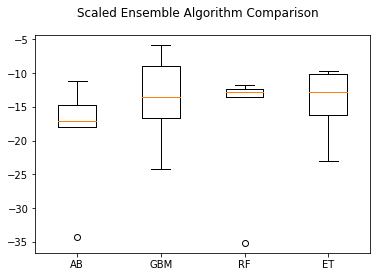

In [45]:
#%% Compare Algorithms
fig = plt.figure()
fig.suptitle('Scaled Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [49]:
#%% Tune scaled GBM
param_grid = dict(n_estimators=numpy.array([50,100,150,200,250,300,350,400,500,600,700,800]))
                                            
model = GradientBoostingRegressor(random_state=5)
kfold = KFold(n_splits=5, shuffle=True, random_state=5)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaled_X, Y_train)

print("Best: %f using %s" % (grid_result.best_score_,grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

D:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best: -13.325770 using {'n_estimators': 400}
-13.964462 (6.489986) with: {'n_estimators': 50}
-13.423739 (6.345398) with: {'n_estimators': 100}
-13.388122 (6.094100) with: {'n_estimators': 150}
-13.367274 (6.014340) with: {'n_estimators': 200}
-13.374812 (6.003822) with: {'n_estimators': 250}
-13.390211 (5.991078) with: {'n_estimators': 300}
-13.349790 (5.948766) with: {'n_estimators': 350}
-13.325770 (5.916579) with: {'n_estimators': 400}
-13.369081 (5.896009) with: {'n_estimators': 500}
-13.375634 (5.895877) with: {'n_estimators': 600}
-13.369869 (5.886876) with: {'n_estimators': 700}
-13.367561 (5.881415) with: {'n_estimators': 800}


## Make predictions on validation dataset

In [ ]:
# prepare the model
# scaler = StandardScaler().fit(X_train)
# rescaledX = scaler.transform(X_train)
model = GradientBoostingRegressor(random_state=5, n_estimators=400)
model.fit(rescaled_X, Y_train)

In [ ]:
# transform the validation dataset
rescaledX_test = scaler.fit_transform(X_test)
predictions = model.predict(rescaledX_test)
print(mean_squared_error(Y_test, predictions))

In [ ]:
numpy.set_printoptions(precision=2)
print(predictions[:10])

In [ ]:
print(Y_test[:10])

In [ ]:
import pandas as pd
df = pd.DataFrame(Y_test, columns=['Y_test'])

In [ ]:
df['Predictions'] = predictions
df.head(10)